In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as scistat

In [2]:
#OBTAINING THE DATA WITHOUT THE VALUE OF OPORTUNITIES FIELDS, AND TITTLES OF INDEXES AND COLUMNS WITHOUT _ (ERRORS) 

dvs = pd.read_excel('Github-Jupyter/DSV/dvs1.xlsx')
dvs.set_index("CustomerName", inplace=True)

In [3]:
#CLEANING DATA AND REMOVING DATa QUALITY ISSUES

dvs.head(5)

,Jun.17.ODW,Jul.17.ODW,Aug.17.ODW,Sep.17.ODW,Oct.17.ODW,Nov.17.ODW,Dec.17.ODW,Jan.18.ODW,Feb.18.ODW,Mar.18.ODW,...,Sep.17.SPA,Oct.17.SPA,Nov.17.SPA,Dec.17.SPA,Jan.18.SPA,Feb.18.SPA,Mar.18.SPA,Apr.18.SPA,May.18.SPA,ATTR.FLAG
CustomerName,,,,,,,,,,,,,,,,,,,,,
CUSTOMER1,1,0,2,2,3,2,3,2,1,3,...,1,1,1,1,1,1,1,1,1,0
CUSTOMER2,5,4,3,2,9,4,9,3,1,5,...,1,1,1,1,1,1,1,1,1,0
CUSTOMER3,4,3,3,2,3,3,2,2,2,0,...,0,0,0,0,0,0,0,0,0,1
CUSTOMER4,35,49,38,14,10,6,28,64,44,29,...,1,1,1,1,1,1,1,1,1,0
CUSTOMER5,9,5,6,4,0,4,11,2,1,4,...,1,1,1,1,1,1,1,1,0,0


In [4]:
len(dvs)

11330

In [5]:
dvs.shape

(11330, 37)

In [6]:
#Is there missing values (NULL)?

dvs.isnull().values.any()

False

In [7]:
dvs.isnull().any()

Jun.17.ODW    False
Jul.17.ODW    False
Aug.17.ODW    False
Sep.17.ODW    False
Oct.17.ODW    False
Nov.17.ODW    False
Dec.17.ODW    False
Jan.18.ODW    False
Feb.18.ODW    False
Mar.18.ODW    False
Apr.18.ODW    False
May.18.ODW    False
Jun.17.VIS    False
Jul.17.VIS    False
Aug.17.VIS    False
Sep.17.VIS    False
Oct.17.VIS    False
Nov.17.VIS    False
Dec.17.VIS    False
Jan.18.VIS    False
Feb.18.VIS    False
Mar.18.VIS    False
Apr.18.VIS    False
May.18.VIS    False
Jun.17.SPA    False
Jul.17.SPA    False
Aug.17.SPA    False
Sep.17.SPA    False
Oct.17.SPA    False
Nov.17.SPA    False
Dec.17.SPA    False
Jan.18.SPA    False
Feb.18.SPA    False
Mar.18.SPA    False
Apr.18.SPA    False
May.18.SPA    False
ATTR.FLAG     False
dtype: bool

In [8]:
#How many NULLS?

dvs.isnull().sum()

Jun.17.ODW    0
Jul.17.ODW    0
Aug.17.ODW    0
Sep.17.ODW    0
Oct.17.ODW    0
Nov.17.ODW    0
Dec.17.ODW    0
Jan.18.ODW    0
Feb.18.ODW    0
Mar.18.ODW    0
Apr.18.ODW    0
May.18.ODW    0
Jun.17.VIS    0
Jul.17.VIS    0
Aug.17.VIS    0
Sep.17.VIS    0
Oct.17.VIS    0
Nov.17.VIS    0
Dec.17.VIS    0
Jan.18.VIS    0
Feb.18.VIS    0
Mar.18.VIS    0
Apr.18.VIS    0
May.18.VIS    0
Jun.17.SPA    0
Jul.17.SPA    0
Aug.17.SPA    0
Sep.17.SPA    0
Oct.17.SPA    0
Nov.17.SPA    0
Dec.17.SPA    0
Jan.18.SPA    0
Feb.18.SPA    0
Mar.18.SPA    0
Apr.18.SPA    0
May.18.SPA    0
ATTR.FLAG     0
dtype: int64

In [9]:
# Descriptive Analysis

dvs.describe(include = 'all')

,Jun.17.ODW,Jul.17.ODW,Aug.17.ODW,Sep.17.ODW,Oct.17.ODW,Nov.17.ODW,Dec.17.ODW,Jan.18.ODW,Feb.18.ODW,Mar.18.ODW,...,Sep.17.SPA,Oct.17.SPA,Nov.17.SPA,Dec.17.SPA,Jan.18.SPA,Feb.18.SPA,Mar.18.SPA,Apr.18.SPA,May.18.SPA,ATTR.FLAG
count,11330.000000,11330.000000,11330.000000,11330.000000,11330.000000,11330.000000,11330.00000,11330.000000,11330.000000,11330.000000,...,11330.000000,11330.000000,11330.000000,11330.000000,11330.000000,11330.000000,11330.000000,11330.000000,11330.000000,11330.000000
mean,18.588526,18.515711,19.070256,18.361342,18.318270,19.541218,17.49947,18.912004,16.713239,18.500618,...,5.470344,5.487202,5.528420,5.479612,5.570786,5.582348,5.575022,5.589232,5.602736,0.188703
std,93.493820,98.131818,100.808193,98.594412,99.854454,108.141478,91.36745,103.137965,89.839643,98.210687,...,75.865153,75.874041,76.014381,75.786023,75.850752,75.873199,75.771677,75.776802,75.708805,0.391289
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,11.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
max,3928.000000,4124.000000,4452.000000,4648.000000,4597.000000,5112.000000,4062.00000,4945.000000,4258.000000,4760.000000,...,7565.000000,7566.000000,7577.000000,7552.000000,7547.000000,7549.000000,7538.000000,7538.000000,7529.000000,1.000000


In [10]:
# Count of 0s and 1s in the target value (y) ATTR.FLAG. 0 for NO LOST, 1 FOR LOST CLIENT

dvs['ATTR.FLAG'].value_counts(0)

0    9192
1    2138
Name: ATTR.FLAG, dtype: int64

In [11]:
# Count of 0s and 1s in the target value (y) ATTR.FLAG. 0 for NO LOST, 1 FOR LOST CLIENT

dvs['ATTR.FLAG'].value_counts(1)*100

0    81.129744
1    18.870256
Name: ATTR.FLAG, dtype: float64

In [12]:
# Count how mamy orders were lost because the churn rate

dvs['Total.ODW'] = dvs[['Jun.17.ODW', 'Jul.17.ODW', 'Aug.17.ODW', 'Sep.17.ODW', 'Oct.17.ODW',
       'Nov.17.ODW', 'Dec.17.ODW', 'Jan.18.ODW', 'Feb.18.ODW', 'Mar.18.ODW',
       'Apr.18.ODW', 'May.18.ODW']].sum(axis=1)
prt = pd.DataFrame(dvs, columns=['Total.ODW', 'ATTR.FLAG'])
prt1 = prt[prt['ATTR.FLAG'] > 0]
a = prt1['Total.ODW'].sum()
b = prt['Total.ODW'].sum()
print(prt1.describe())
print(a/b*100)

          Total.ODW  ATTR.FLAG
count   2138.000000     2138.0
mean     136.470065        1.0
std      589.201368        0.0
min       21.000000        1.0
25%       27.000000        1.0
50%       40.000000        1.0
75%       79.000000        1.0
max    16415.000000        1.0
11.594129759775058


In [13]:
# Check the types

dvs.dtypes

Jun.17.ODW    int64
Jul.17.ODW    int64
Aug.17.ODW    int64
Sep.17.ODW    int64
Oct.17.ODW    int64
Nov.17.ODW    int64
Dec.17.ODW    int64
Jan.18.ODW    int64
Feb.18.ODW    int64
Mar.18.ODW    int64
Apr.18.ODW    int64
May.18.ODW    int64
Jun.17.VIS    int64
Jul.17.VIS    int64
Aug.17.VIS    int64
Sep.17.VIS    int64
Oct.17.VIS    int64
Nov.17.VIS    int64
Dec.17.VIS    int64
Jan.18.VIS    int64
Feb.18.VIS    int64
Mar.18.VIS    int64
Apr.18.VIS    int64
May.18.VIS    int64
Jun.17.SPA    int64
Jul.17.SPA    int64
Aug.17.SPA    int64
Sep.17.SPA    int64
Oct.17.SPA    int64
Nov.17.SPA    int64
Dec.17.SPA    int64
Jan.18.SPA    int64
Feb.18.SPA    int64
Mar.18.SPA    int64
Apr.18.SPA    int64
May.18.SPA    int64
ATTR.FLAG     int64
Total.ODW     int64
dtype: object

In [14]:
# EXPLORING DATA FOR RELATIONSHIP BETWEEN FEATURES

corr = dvs.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values,annot=True)
corr

,Jun.17.ODW,Jul.17.ODW,Aug.17.ODW,Sep.17.ODW,Oct.17.ODW,Nov.17.ODW,Dec.17.ODW,Jan.18.ODW,Feb.18.ODW,Mar.18.ODW,...,Oct.17.SPA,Nov.17.SPA,Dec.17.SPA,Jan.18.SPA,Feb.18.SPA,Mar.18.SPA,Apr.18.SPA,May.18.SPA,ATTR.FLAG,Total.ODW
Jun.17.ODW,1.000000,0.975850,0.957732,0.947497,0.936939,0.941104,0.934865,0.917894,0.908224,0.901491,...,0.079528,0.080684,0.080473,0.081781,0.081932,0.081690,0.081756,0.082147,-0.016449,0.957859
Jul.17.ODW,0.975850,1.000000,0.983141,0.971788,0.954788,0.952500,0.938608,0.921208,0.906436,0.895356,...,0.072847,0.073765,0.073633,0.074831,0.074981,0.074713,0.074771,0.075134,-0.015865,0.963546
Aug.17.ODW,0.957732,0.983141,1.000000,0.984773,0.964226,0.959562,0.947828,0.933453,0.919863,0.907948,...,0.070867,0.071637,0.071527,0.072732,0.072896,0.072672,0.072743,0.073108,-0.015920,0.970051
Sep.17.ODW,0.947497,0.971788,0.984773,1.000000,0.984612,0.975642,0.955442,0.938884,0.929671,0.922689,...,0.072915,0.073668,0.073534,0.074796,0.074945,0.074777,0.074834,0.075202,-0.019159,0.976913
Oct.17.ODW,0.936939,0.954788,0.964226,0.984612,1.000000,0.988319,0.968813,0.953059,0.947780,0.941855,...,0.073312,0.074019,0.073882,0.075158,0.075318,0.075204,0.075213,0.075583,-0.022626,0.983182
Nov.17.ODW,0.941104,0.952500,0.959562,0.975642,0.988319,1.000000,0.981159,0.971395,0.962492,0.954186,...,0.071616,0.072287,0.072119,0.073413,0.073561,0.073496,0.073502,0.073864,-0.027306,0.990003
Dec.17.ODW,0.934865,0.938608,0.947828,0.955442,0.968813,0.981159,1.000000,0.982347,0.965141,0.954196,...,0.079529,0.080417,0.080263,0.081537,0.081686,0.081664,0.081703,0.082070,-0.033045,0.985539
Jan.18.ODW,0.917894,0.921208,0.933453,0.938884,0.953059,0.971395,0.982347,1.000000,0.983982,0.970190,...,0.072974,0.073746,0.073655,0.074949,0.075113,0.075080,0.075103,0.075465,-0.041231,0.983563
Feb.18.ODW,0.908224,0.906436,0.919863,0.929671,0.947780,0.962492,0.965141,0.983982,1.000000,0.986048,...,0.078488,0.079268,0.079144,0.080480,0.080680,0.080617,0.080662,0.081023,-0.048369,0.979492
Mar.18.ODW,0.901491,0.895356,0.907948,0.922689,0.941855,0.954186,0.954196,0.970190,0.986048,1.000000,...,0.082732,0.083638,0.083494,0.084861,0.085035,0.084993,0.085076,0.085477,-0.050786,0.973530


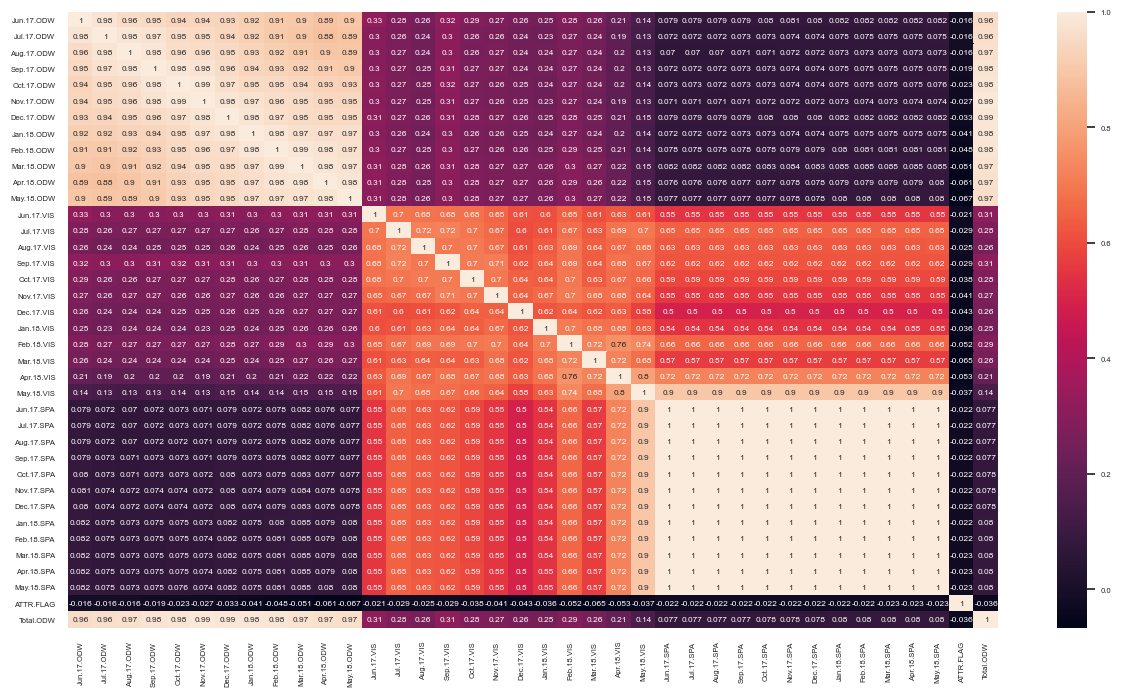

In [16]:
corr = dvs.corr()
plt.figure(figsize=(15,8))
sns.set(font_scale=0.5)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)
plt.show()

c:\users\javier\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\javier\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\javier\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

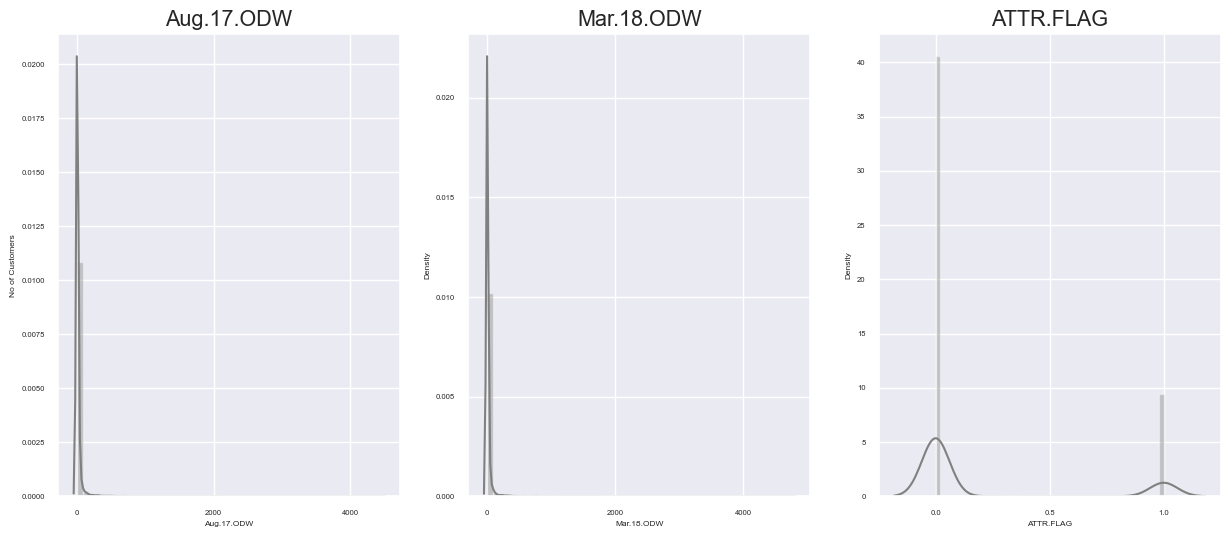

In [17]:
f, axes = plt.subplots(ncols=3, figsize=(15, 6))
sns.set(font_scale=1.3)
sns.distplot(dvs['Aug.17.ODW'], kde=True, color="gray",ax=axes[0]).set_title('Aug.17.ODW')
sns.distplot(dvs['Mar.18.ODW'], kde=True, color="gray",ax=axes[1]).set_title('Mar.18.ODW')
sns.distplot(dvs['ATTR.FLAG'], kde=True, color="gray",ax=axes[2]).set_title('ATTR.FLAG')
axes[0].set_ylabel('No of Customers')
plt.show()

In [18]:
# MODELIN THE DATA
#Tree-based feature selection with RANDOM FORREST

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets

target = 'ATTR.FLAG'
X = dvs.drop('ATTR.FLAG', axis=1)
y = dvs[target]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)


In [19]:
# Fit the model using the random forest classifier for feature selection

forest=RandomForestClassifier(n_estimators=500,random_state=1)
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500, random_state=1)

In [20]:
# feature_importances_ finds the important features, stored in  importances

importances=forest.feature_importances_

In [21]:
# Sort the important features from the importances using argsort function

features = dvs.drop(['ATTR.FLAG'],axis=1).columns
indices = np.argsort(importances)[::-1]

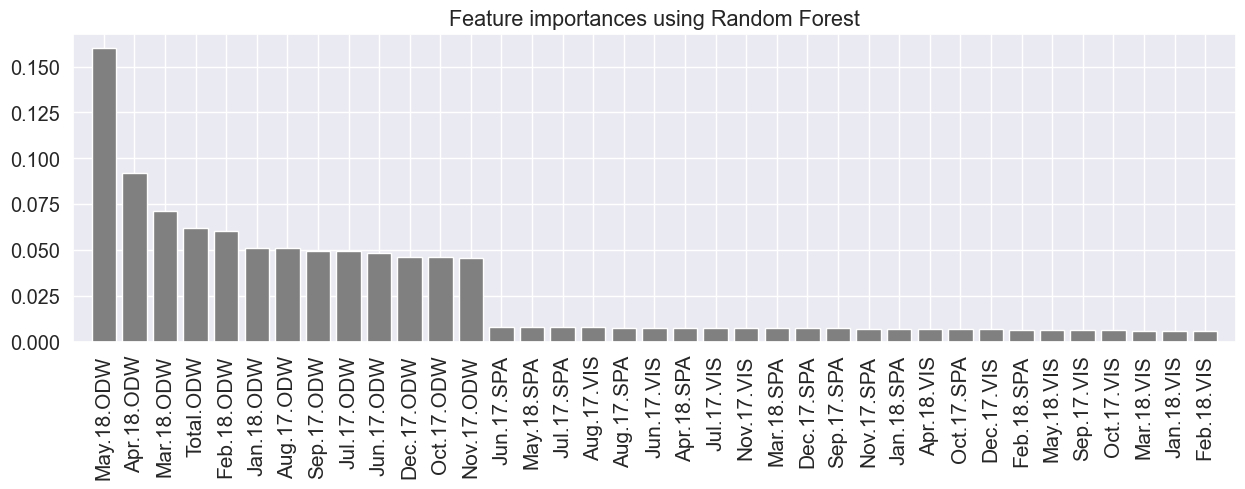

In [22]:
# Make a visualization of the principals features

plt.figure(figsize=(15,4))
plt.title("Feature importances using Random Forest")
plt.bar(range(X_train.shape[1]), importances[indices], color="gray", align="center")
plt.xticks(range(X_train.shape[1]), features[indices], rotation='vertical',fontsize=15)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [23]:
# Make he features and their importance a pandas DataFrame

feature_importance_df = pd.DataFrame({"Feature":features,"Importance":importances})
print(feature_importance_df)

       Feature  Importance
0   Jun.17.ODW    0.048215
1   Jul.17.ODW    0.049200
2   Aug.17.ODW    0.050824
3   Sep.17.ODW    0.049325
4   Oct.17.ODW    0.046297
5   Nov.17.ODW    0.045594
6   Dec.17.ODW    0.046391
7   Jan.18.ODW    0.050998
8   Feb.18.ODW    0.060238
9   Mar.18.ODW    0.071196
10  Apr.18.ODW    0.092021
11  May.18.ODW    0.159996
12  Jun.17.VIS    0.007527
13  Jul.17.VIS    0.007399
14  Aug.17.VIS    0.007726
15  Sep.17.VIS    0.006514
16  Oct.17.VIS    0.006273
17  Nov.17.VIS    0.007395
18  Dec.17.VIS    0.006583
19  Jan.18.VIS    0.005757
20  Feb.18.VIS    0.005489
21  Mar.18.VIS    0.005997
22  Apr.18.VIS    0.006673
23  May.18.VIS    0.006534
24  Jun.17.SPA    0.008170
25  Jul.17.SPA    0.007768
26  Aug.17.SPA    0.007635
27  Sep.17.SPA    0.007214
28  Oct.17.SPA    0.006641
29  Nov.17.SPA    0.006872
30  Dec.17.SPA    0.007239
31  Jan.18.SPA    0.006819
32  Feb.18.SPA    0.006547
33  Mar.18.SPA    0.007357
34  Apr.18.SPA    0.007509
35  May.18.SPA    0.008124
3

In [25]:
# MODEL BUILDING with Statsmodel
#1° Logistic Regression with all the features

logReg = sm.Logit(y_train, X_train)
logistic_regression = logReg.fit()
logistic_regression.summary
logistic_regression.params

         Current function value: 0.478858
         Iterations: 35


c:\users\javier\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Jun.17.ODW    0.015943
Jul.17.ODW    0.008277
Aug.17.ODW    0.042426
Sep.17.ODW    0.014849
Oct.17.ODW    0.034446
Nov.17.ODW    0.006474
Dec.17.ODW    0.006698
Jan.18.ODW    0.019820
Feb.18.ODW   -0.023941
Mar.18.ODW    0.035060
Apr.18.ODW   -0.029209
May.18.ODW   -0.141120
Jun.17.VIS    0.168671
Jul.17.VIS    0.037994
Aug.17.VIS    0.171002
Sep.17.VIS   -0.119540
Oct.17.VIS   -0.029620
Nov.17.VIS   -0.088870
Dec.17.VIS   -0.101701
Jan.18.VIS    0.111450
Feb.18.VIS   -0.124918
Mar.18.VIS   -0.249068
Apr.18.VIS   -0.124659
May.18.VIS   -0.210858
Jun.17.SPA    0.146713
Jul.17.SPA   -0.350380
Aug.17.SPA   -0.045651
Sep.17.SPA    0.188403
Oct.17.SPA   -0.285140
Nov.17.SPA    0.084571
Dec.17.SPA    0.179535
Jan.18.SPA   -0.245585
Feb.18.SPA    0.530153
Mar.18.SPA   -0.178230
Apr.18.SPA    0.189395
May.18.SPA   -0.364228
Total.ODW    -0.009230
dtype: float64

In [26]:
# 2° Logistic Regression with the important features

top12_features = ['May.18.ODW', 'Apr.18.ODW', 'Mar.18.ODW', 'Feb.18.ODW','Aug.17.ODW', 'Sep.17.ODW','Jul.17.ODW',
                  'Jan.18.ODW','Jun.17.ODW', 'Nov.17.ODW', 'Oct.17.ODW', 'Dec.17.ODW']
logReg = sm.Logit(y_train, X_train[top12_features])
logistic_regression = logReg.fit()
logistic_regression.summary
logistic_regression.params

Optimization terminated successfully.
         Current function value: 0.499280
         Iterations 9


May.18.ODW   -0.169871
Apr.18.ODW   -0.040655
Mar.18.ODW    0.018844
Feb.18.ODW   -0.035862
Aug.17.ODW    0.033592
Sep.17.ODW    0.004215
Jul.17.ODW   -0.005599
Jan.18.ODW    0.014563
Jun.17.ODW    0.001944
Nov.17.ODW   -0.004359
Oct.17.ODW    0.017785
Dec.17.ODW    0.000304
dtype: float64

In [28]:
# MODEL BUIDING WITH scikit-learn's LogisticRegression

from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train[top12_features], y_train)

In [29]:
# Making the evaluation
lg.predict(X_test[top12_features])
lg.predict_proba(X_test[top12_features])

array([[7.55031678e-01, 2.44968322e-01],
       [9.99679617e-01, 3.20383114e-04],
       [7.54228502e-01, 2.45771498e-01],
       ...,
       [6.74675564e-01, 3.25324436e-01],
       [8.19365714e-01, 1.80634286e-01],
       [8.86876508e-01, 1.13123492e-01]])

In [30]:
# FINAL ACCURACY OF THE MODEL
lg.score(X_test[top12_features], y_test)

0.8123529411764706

In [42]:
#               INTERPRETING THE DATA
#- The percentage of customers that churned is 18.8% (2.138) and the percentage that did not churn is 81.12% (9.192)
#- The most important features selected from tree-based feature selection are May.18.ODW', 'Apr.18.ODW', 'Mar.18.ODW',
#'Feb.18.ODW','Aug.17.ODW', 'Sep.17.ODW','Jul.17.ODW','Jan.18.ODW','Jun.17.ODW', 'Nov.17.ODW', 'Oct.17.ODW', 'Dec.17.ODW
#- The model from  scikit-learn's LogisticRegression is better with an accuracy of 81,2%
#- Its is interesting that the most important features of the model (81% accurarcy) were the AMOUNT OF ORDERS, and not the
# the total times the customer was contacted, or the amount of internal resource assignments to the specific customer.
#- The problem are not in the CRM, instead is in the MARKETING (the mix PRODUCT-SERVICE),
# I mean in the SEGMENTATION OF CLIENTS, the VALUE PROPOTITION OF PRODUCT-SERVICE, and in the PRICE


In [31]:
# MODEL USING RANDAOM FORREST

RF = RandomForestClassifier(n_estimators=20, max_depth=None,min_samples_split=7, random_state=0)
RF.fit(X_train[top12_features],y_train)

RandomForestClassifier(min_samples_split=7, n_estimators=20, random_state=0)

In [32]:
RF.score(X_test[top12_features], y_test)

0.8588235294117647

In [34]:
#FINETUNNIG WITH GRID SEARCH

from sklearn.model_selection import GridSearchCV

RF1 = RandomForestClassifier(random_state=42)
RF1.fit(X_train,y_train)
s = RF1.score(X_test, y_test)
param_grid = [ {'min_samples_split': [2,30], 'n_estimators':[100,150,160], 'max_depth': [5,50]}]
GR_RF1 = GridSearchCV(estimator=RF1, param_grid=param_grid, cv=5)
GR_RF1.fit(X_train, y_train)

print('best score train:', GR_RF1.best_score_)
print('best parameters train: ', GR_RF1.best_params_)

best score train: 0.8640706126687435
best parameters train:  {'max_depth': 50, 'min_samples_split': 2, 'n_estimators': 150}


In [38]:
#Evaluating the Performance Metrics

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import metrics

y_pred=RF.predict(X_test[top12_features])
target_names = ['No Churn', 'Churn']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    No Churn       0.87      0.97      0.92      1379
       Churn       0.74      0.39      0.51       321

    accuracy                           0.86      1700
   macro avg       0.81      0.68      0.71      1700
weighted avg       0.85      0.86      0.84      1700



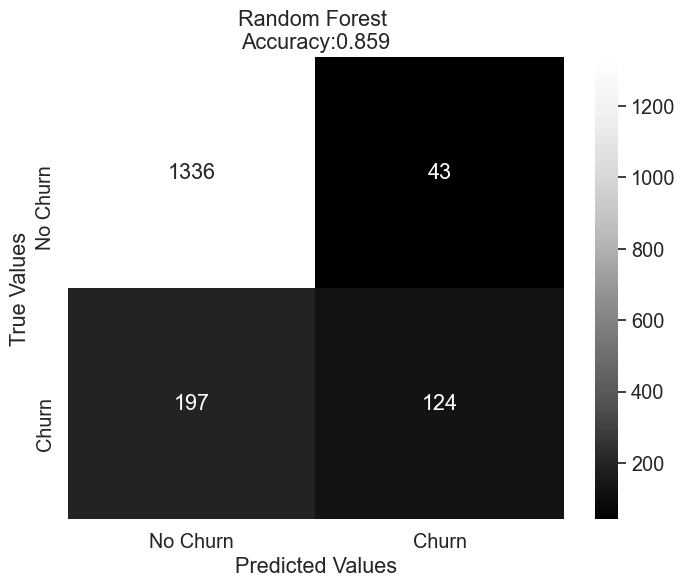

In [39]:
#Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,index = ['No Churn','Churn'],columns = ['No Churn','Churn'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt='g',cmap='Greys_r')
plt.title('Random Forest \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

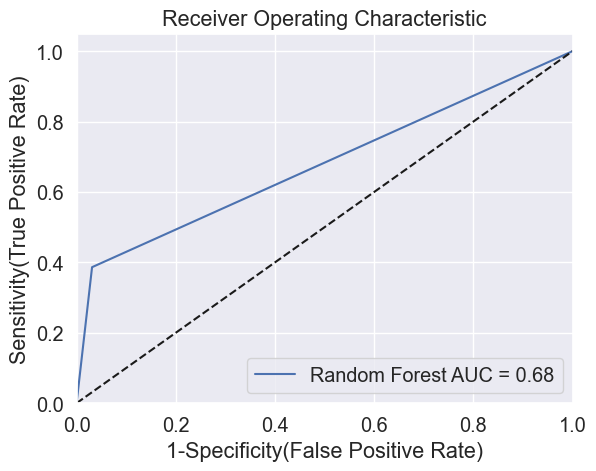

In [42]:
# Performance Clasification

from sklearn.metrics import roc_curve,auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='%s AUC = %0.2f' % ('Random Forest', roc_auc))
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('Sensitivity(True Positive Rate)')
plt.xlabel('1-Specificity(False Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
